In [3]:
%matplotlib inline
#import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')



In [4]:
tmp = np.array([1, 2, 3])



In [5]:
tmp = pd.DataFrame({'Power_1': tmp})

In [6]:
def polynomialFrame(feature, degree):
    polyFrame = pd.DataFrame()
    polyFrame['power_1'] = feature
    if degree > 1:
        for power in range(2, degree + 1):
            name = "power_" + str(power)
            polyFrame[name] = feature.apply(lambda x : x**power)
    return polyFrame
    

In [7]:
polynomialFrame(tmp, 3)

,power_1,power_2,power_3
0,1,1,1
1,2,4,8
2,3,9,27


In [23]:
%ls

2_week-4-ridge-regression-assignment-1-blank.ipynb
Assig_1_Seattle_housing_regression.ipynb
Matrix Week 2 assignment.ipynb
Overfitting_Demo_Ridge_Lasso (1).ipynb
Overfitting_Demo_Ridge_Lasso.ipynb
Polynomial_with_SciPy.ipynb
Week 2 assignmnet.ipynb
copy2_week-2-multiple-regression-assignment-1-blank.ipynb
extra_week-1-simple-regression-assignment-blank.ipynb
extra_week-2-multiple-regression-assignment-2-blank.ipynb
house_set_1_data.csv
house_set_2_data.csv
house_set_4_data.csv
house_test_data.csv*
house_train_data.csv*
house_valid_data.csv*
kc_house_set_3_data.csv
week-3-polynomial-regression-assignment-blank.ipynb
week-4-ridge-regression-assignment-1-blank.ipynb
week-4-ridge-regression-assignment-2-blank.ipynb
week-5-lasso-assignment-1-blank.ipynb
week-5-lasso-assignment-2-blank.ipynb
week-6-local-regression-assignment-blank.ipynb


In [8]:
df = pd.read_csv('house_train_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9761 entries, 0 to 9760
Data columns (total 21 columns):
id               9761 non-null int64
date             9761 non-null object
price            9761 non-null float64
bedrooms         9761 non-null int64
bathrooms        9761 non-null float64
sqft_living      9761 non-null int64
sqft_lot         9761 non-null int64
floors           9761 non-null float64
waterfront       9761 non-null int64
view             9761 non-null int64
condition        9761 non-null int64
grade            9761 non-null int64
sqft_above       9761 non-null int64
sqft_basement    9761 non-null int64
yr_built         9761 non-null int64
yr_renovated     9761 non-null int64
zipcode          9761 non-null int64
lat              9761 non-null float64
long             9761 non-null float64
sqft_living15    9761 non-null int64
sqft_lot15       9761 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 1.6+ MB


In [29]:
import pandas_profiling

/Users/jimdoone/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [16]:
pandas_profiling.ProfileReport(df)



Number of variables,21
Number of observations,9761
Total Missing (%),0.0%
Total size in memory,1.6 MiB
Average record size in memory,168.0 B
Numeric,20
Categorical,1
Date,0
Text (Unique),0
Rejected,0
Distinct count,28


In [9]:
X = df[[
    "sqft_living", "bathrooms", "bedrooms"]]
y = df["price"]

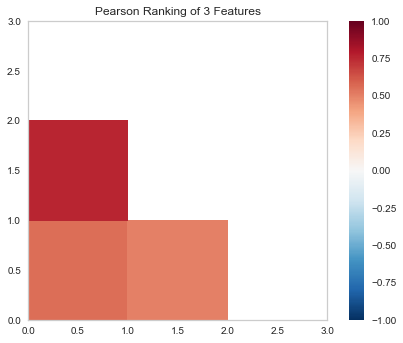

In [10]:
from yellowbrick.features import Rank2D

visualizer = Rank2D(algorithm="pearson")
visualizer.fit_transform(X)
visualizer.poof()

In [11]:
for i, j in enumerate(X):
    print(f"{i}: {j}")

0: sqft_living
1: bathrooms
2: bedrooms


/Users/jimdoone/anaconda/lib/python3.6/site-packages/yellowbrick/features/jointplot.py:139: UserWarning: JointPlotVisualizer requires Matplotlib version 2.0.0.Please upgrade to continue.
  ).format(self.__class__.__name__))


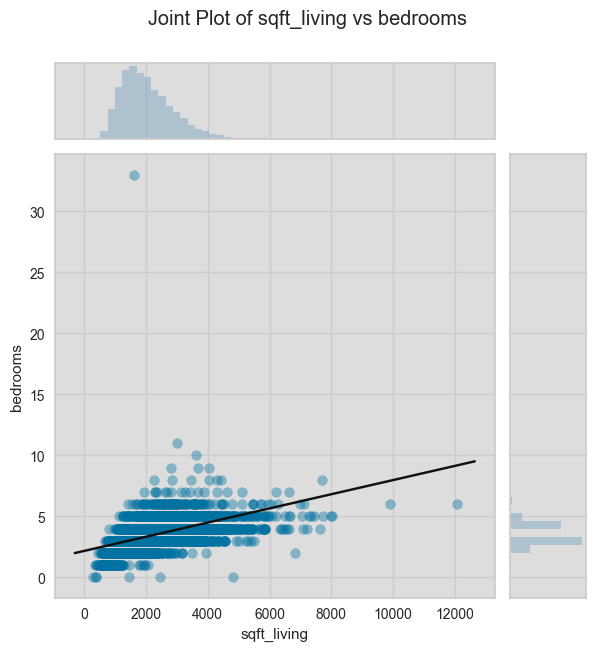

In [21]:
from yellowbrick.features import JointPlotVisualizer

visualizer = JointPlotVisualizer(feature='sqft_living', target='bedrooms')
visualizer.fit(X['sqft_living'], X['bedrooms'])
visualizer.poof()

/Users/jimdoone/anaconda/lib/python3.6/site-packages/yellowbrick/features/jointplot.py:139: UserWarning: JointPlotVisualizer requires Matplotlib version 2.0.0.Please upgrade to continue.
  ).format(self.__class__.__name__))


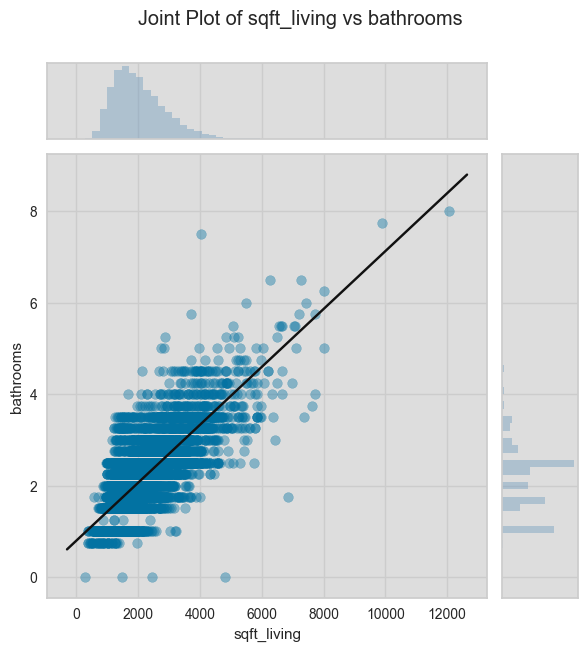

In [23]:
from yellowbrick.features import JointPlotVisualizer

visualizer = JointPlotVisualizer(feature='sqft_living', target='bathrooms')
visualizer.fit(X['sqft_living'], X['bathrooms'])
visualizer.poof()

/Users/jimdoone/anaconda/lib/python3.6/site-packages/yellowbrick/features/jointplot.py:139: UserWarning: JointPlotVisualizer requires Matplotlib version 2.0.0.Please upgrade to continue.
  ).format(self.__class__.__name__))


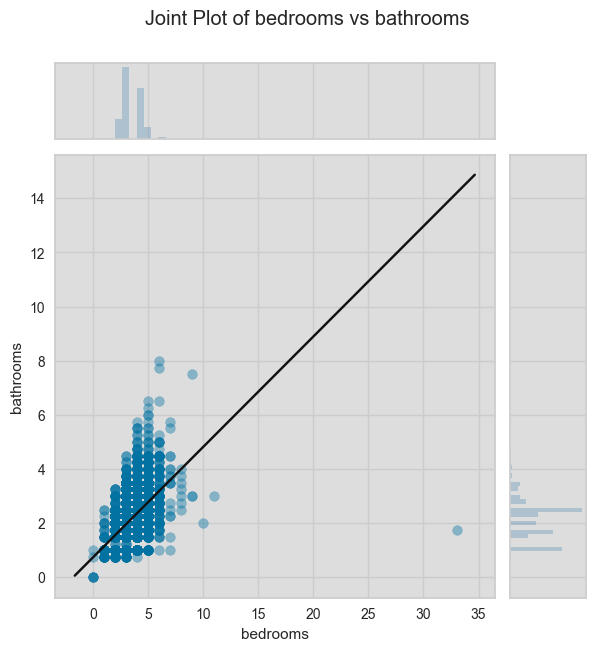

In [24]:
from yellowbrick.features import JointPlotVisualizer

visualizer = JointPlotVisualizer(feature='bedrooms', target='bathrooms')
visualizer.fit(X['bedrooms'], X['bathrooms'])
visualizer.poof()

##### Regress sqft_living *x*  on price *y*

In [12]:
x = df[['sqft_living']].values
y = df['price'].values

##### Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x, y)

##### ypred

In [15]:
ypred = lin_reg.predict(x)

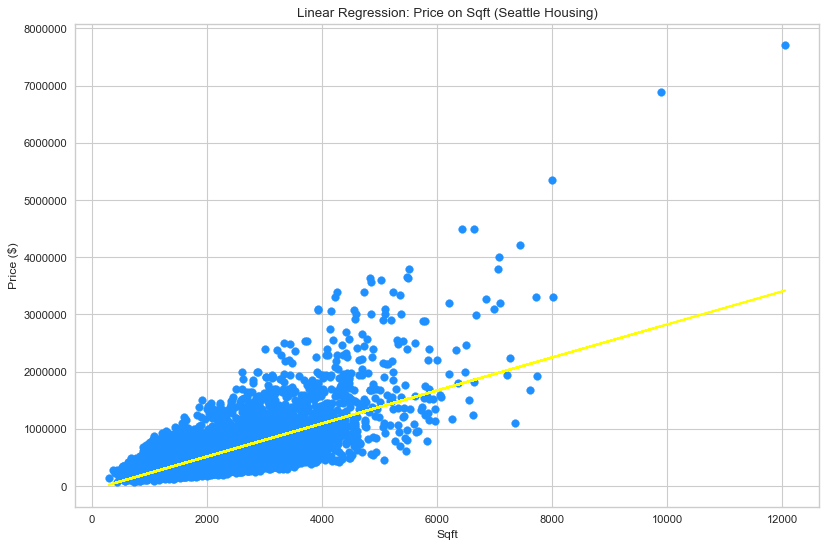

In [21]:
#Linear Regression Results
#Make a note of the code used for the plot
plt.figure(figsize=(12,8), dpi=80)
plt.scatter(x, y, color='dodgerblue')
#plot the predictions
plt.plot(x, lin_reg.predict(x), color='yellow')
plt.title("Linear Regression: Price on Sqft (Seattle Housing)")
plt.xlabel('Sqft')
plt.ylabel('Price ($)')
plt.show()

##### Metrics

In [31]:
coef = lin_reg.coef_
intercept = lin_reg.intercept_ 
print(f'Intercept: {intercept:,.0f}')
print(f'coefficient: {coef}')


#Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, ypred)
print(f"MSE: ${mse:,.0f}")

#Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"RMSE: ${rmse:,.0f}")



#R-squared
from sklearn.metrics import r2_score
rSquared = r2_score(y, ypred)
print(f'R_squared: {rSquared:.3f}')


Intercept: -59,493
coefficient: [ 288.59846375]
MSE: $72,431,084,171
RMSE: $269,130
R_squared: 0.497


##### Polynomial: order 2

In [34]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(x)

poly_reg_2 = LinearRegression()
poly_reg_2.fit(X_poly,y)

# Poly Prediction
yPoly_2 = poly_reg_2.predict(poly_reg.fit_transform(x))

##### Metrics

In [35]:
# Must match regressor object and prediction object
coef = poly_reg_2.coef_
intercept = poly_reg_2.intercept_ 
print(f'Intercept: {intercept:,.0f}')
print(f'coefficient: {coef}')


#Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, yPoly_2)
print(f"MSE: ${mse:,.0f}")

#Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"RMSE: ${rmse:,.0f}")



#R-squared
from sklearn.metrics import r2_score
rSquared = r2_score(y, yPoly_2)
print(f'R_squared: {rSquared:.3f}')

Intercept: 267,506
coefficient: [ 0.          1.22673842  0.0522949 ]
MSE: $63,280,548,389
RMSE: $251,556
R_squared: 0.561


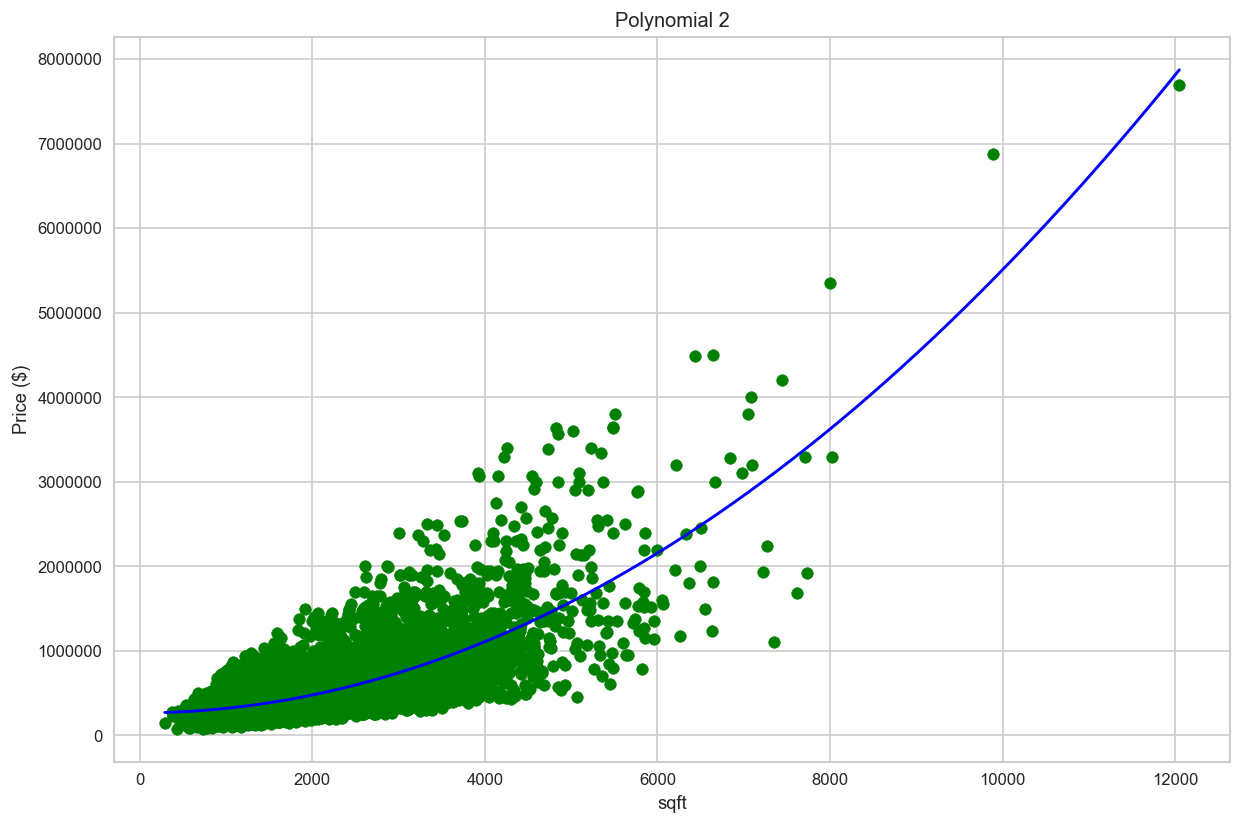

In [36]:

plt.figure(figsize=(12,8), dpi=120)
plt.subplot(111)

#create a grid with continuous 0.1 steps
X_grid = np.arange(min(x), max(x), 0.1)
#Need to reshape the above vector into a matrix
X_grid = X_grid.reshape((len(X_grid),1))
plt.scatter(x, y, color ='green')
plt.plot(X_grid, poly_reg_2.predict(poly_reg.fit_transform(X_grid)), color ='blue')
plt.title("Polynomial 2")
plt.xlabel("sqft")
plt.ylabel("Price ($)")
plt.show()

##### YellowBrick: Residual Plots

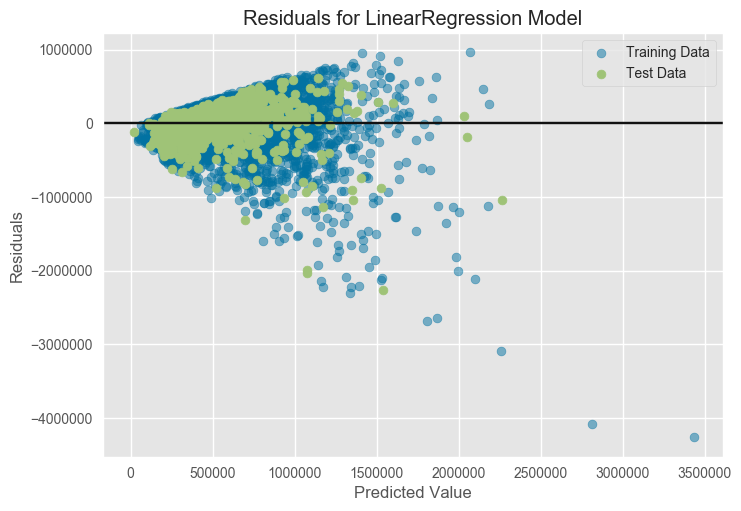

In [69]:
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    sqft, price, test_size=0.1
)

visualizer = ResidualsPlot(LinearRegression())
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

##### Polynomial Statistics: statsmodels

In [37]:
import statsmodels.formula.api as sm
X = np.append(arr=np.ones((9761,1)).astype(int), values =X_poly, axis=1)

regressor_OLS = sm.OLS(endog=y, exog=X_poly).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     6226.
Date:                Sat, 01 Jul 2017   Prob (F-statistic):               0.00
Time:                        09:27:39   Log-Likelihood:            -1.3523e+05
No. Observations:                9761   AIC:                         2.705e+05
Df Residuals:                    9758   BIC:                         2.705e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.675e+05   1.07e+04     24.932      0.000    2.46e+05    2.89e+05
x1             1.2267      8.128      0.151      0.880     -14.707      17.160
x2             0.0523      0.001     37.564      0.000       0.050       0.055
==============================================================================
Omnibus:                     4446.871   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            63078.783
Skew:                           1.812   Prob(JB):                         0.00
Kurtosis:                      14.915   Cond. No.                     3.17e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.17e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Polynomial 3

In [38]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(x)

poly_reg_3 = LinearRegression()
poly_reg_3.fit(X_poly,y)

# Poly Prediction
yPoly_3 = poly_reg_3.predict(poly_reg.fit_transform(x))

##### Metrics: Polynomial 3

In [39]:
# Must match regressor object and prediction object
coef = poly_reg_3.coef_
intercept = poly_reg_3.intercept_ 
print(f'Intercept: {intercept:,.0f}')
print(f'coefficient: {coef}')


#Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, yPoly_3)
print(f"MSE: ${mse:,.0f}")

#Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"RMSE: ${rmse:,.0f}")



#R-squared
from sklearn.metrics import r2_score
rSquared = r2_score(y, yPoly_3)
print(f'R_squared: {rSquared:.3f}')

Intercept: 262,171
coefficient: [  0.00000000e+00   7.50292077e+00   5.03063603e-02   1.67090668e-07]
MSE: $63,279,391,580
RMSE: $251,554
R_squared: 0.561


In [40]:
import statsmodels.formula.api as sm
X = np.append(arr=np.ones((9761,1)).astype(int), values =X_poly, axis=1)

regressor_OLS = sm.OLS(endog=y, exog=X_poly).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     4150.
Date:                Sat, 01 Jul 2017   Prob (F-statistic):               0.00
Time:                        09:33:14   Log-Likelihood:            -1.3523e+05
No. Observations:                9761   AIC:                         2.705e+05
Df Residuals:                    9757   BIC:                         2.705e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.622e+05   1.66e+04     15.817      0.000     2.3e+05    2.95e+05
x1             7.5029     16.939      0.443      0.658     -25.700      40.706
x2             0.0503      0.005     10.246      0.000       0.041       0.060
x3          1.671e-07   3.96e-07      0.422      0.673   -6.08e-07    9.43e-07
==============================================================================
Omnibus:                     4460.181   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            63364.303
Skew:                           1.819   Prob(JB):                         0.00
Kurtosis:                      14.940   Cond. No.                     2.46e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.46e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

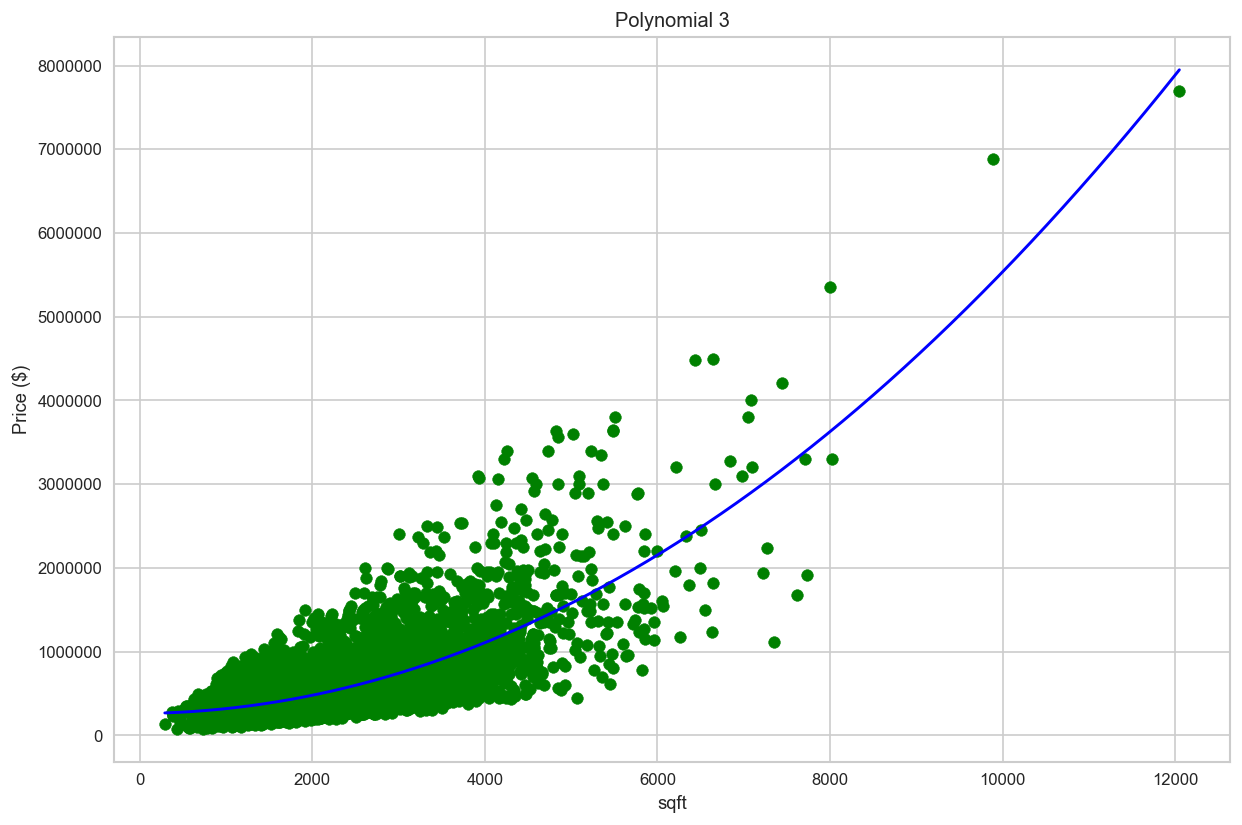

In [43]:
import matplotlib.pyplot
plt.figure(figsize=(12,8), dpi=120)
plt.subplot(111)

#create a grid with continuous 0.1 steps
X_grid = np.arange(min(x), max(x), 0.1)
#Need to reshape the above vector into a matrix
X_grid = X_grid.reshape((len(X_grid),1))
plt.scatter(x, y, color ='green')
plt.plot(X_grid, poly_reg_3.predict(poly_reg.fit_transform(X_grid)), color ='blue')
plt.title("Polynomial 3")
plt.xlabel("sqft")
plt.ylabel("Price ($)")
plt.show()

##### 6th order polynomial

In [49]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=6)
X_poly = poly_reg.fit_transform(x)

poly_reg_6 = LinearRegression()
poly_reg_6.fit(X_poly,y)

# Poly Prediction
yPoly_6 = poly_reg_6.predict(poly_reg.fit_transform(x))

##### Metrics: Polynomial 6

In [50]:
# Must match regressor object and prediction object
coef = poly_reg_6.coef_
intercept = poly_reg_6.intercept_ 
print(f'Intercept: {intercept:,.0f}')
print(f'coefficient: {coef}')


#Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, yPoly_6)
print(f"MSE: ${mse:,.0f}")

#Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"RMSE: ${rmse:,.0f}")



#R-squared
from sklearn.metrics import r2_score
rSquared = r2_score(y, yPoly_6)
print(f'R_squared: {rSquared:.3f}')

Intercept: 297,507
coefficient: [  0.00000000e+00   1.99363115e-08   2.44830292e-08   3.79412496e-05
  -9.89793412e-09   1.06074595e-12  -3.90873908e-17]
MSE: $63,129,702,329
RMSE: $251,256
R_squared: 0.562


In [51]:
import statsmodels.formula.api as sm
X = np.append(arr=np.ones((9761,1)).astype(int), values =X_poly, axis=1)

regressor_OLS = sm.OLS(endog=y, exog=X_poly).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     2158.
Date:                Sat, 01 Jul 2017   Prob (F-statistic):               0.00
Time:                        09:50:16   Log-Likelihood:            -1.3676e+05
No. Observations:                9761   AIC:                         2.735e+05
Df Residuals:                    9757   BIC:                         2.736e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.922e-14   3.15e-16     92.777      0.000    2.86e-14    2.98e-14
x1            4.1e-08   4.42e-10     92.777      0.000    4.01e-08    4.19e-08
x2          9.407e-08   1.01e-09     92.777      0.000    9.21e-08    9.61e-08
x3             0.0001   1.23e-06     92.777      0.000       0.000       0.000
x4         -4.088e-08   6.12e-10    -66.810      0.000   -4.21e-08   -3.97e-08
x5          5.068e-12    9.2e-14     55.112      0.000    4.89e-12    5.25e-12
x6         -2.019e-16   4.16e-18    -48.496      0.000    -2.1e-16   -1.94e-16
==============================================================================
Omnibus:                     2302.236   Durbin-Watson:                   1.837
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27890.367
Skew:                           0.786   Prob(JB):                         0.00
Kurtosis:                      11.131   Cond. No.                     5.43e+23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.43e+23. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

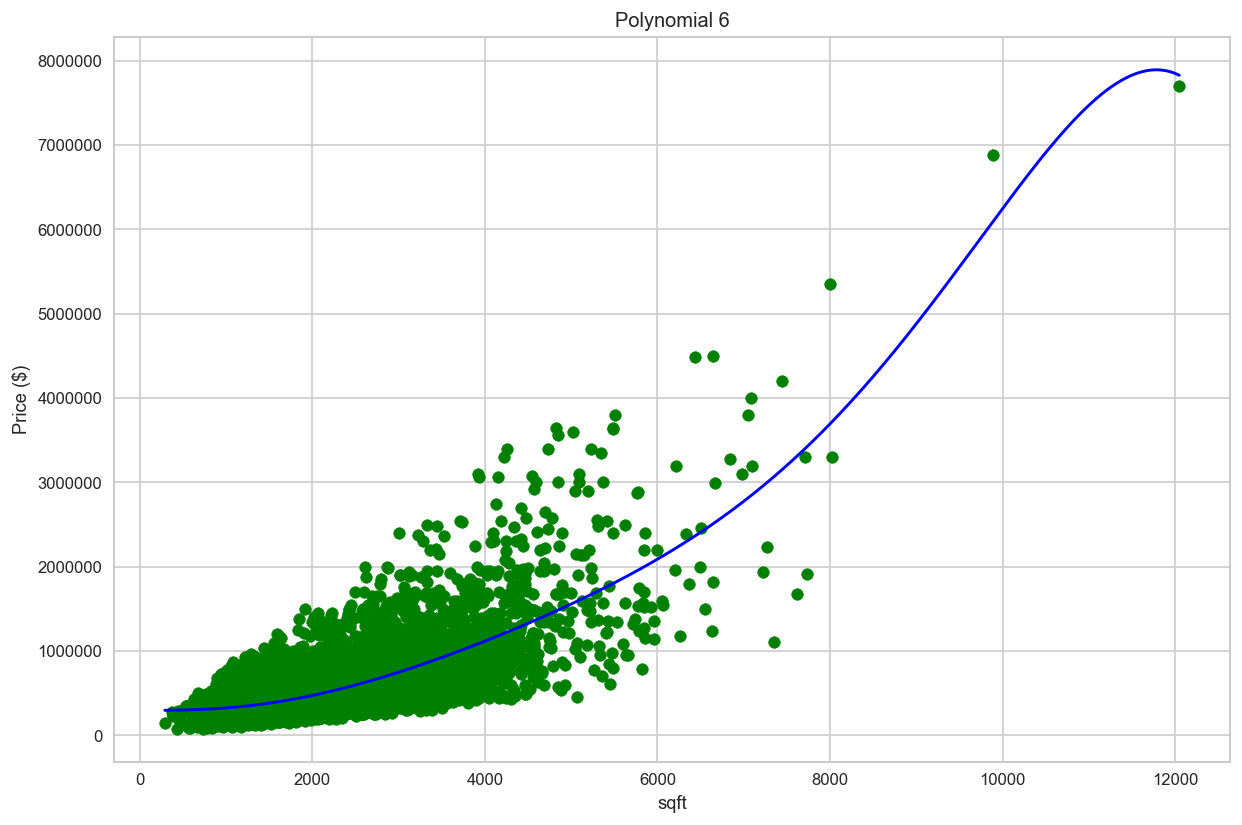

In [52]:
plt.figure(figsize=(12,8), dpi=120)
plt.subplot(111)

#create a grid with continuous 0.1 steps
X_grid = np.arange(min(x), max(x), 0.1)
#Need to reshape the above vector into a matrix
X_grid = X_grid.reshape((len(X_grid),1))
plt.scatter(x, y, color ='green')
plt.plot(X_grid, poly_reg_6.predict(poly_reg.fit_transform(X_grid)), color ='blue')
plt.title("Polynomial 6")
plt.xlabel("sqft")
plt.ylabel("Price ($)")
plt.show()

##### Cross Validation: Kfolds

- Standard deviation is the square root of the variance, so low std means there is low variance.

-  When the accuracies don't  vary that much,  there is  low variance.

-  the average accuracy is high, the model is not biased to any training set.

- Hence, low bias, low variance.


In [53]:
# poly 6
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=poly_reg_6, X= x, y = y, cv=10)

In [55]:
kfoldMean = accuracies.mean()
kfoldStd = accuracies.std()
print(f"The mean of 10 cross validation is {kfoldMean:.4f}")
print(f"The std of 10 cross validation is {kfoldStd:.4f}")

The mean of 10 cross validation is 0.4897
The std of 10 cross validation is 0.0339


##### Validation Set

In [60]:
valid = pd.read_csv('house_valid_data.csv')
xV = valid[['sqft_living']].values
yV = valid['price'].values

##### Test Set

In [61]:
test = pd.read_csv('house_test_data.csv')
xT = test[['sqft_living']].values
yT = test['price'].values

##### Polynomial 6 on Validation

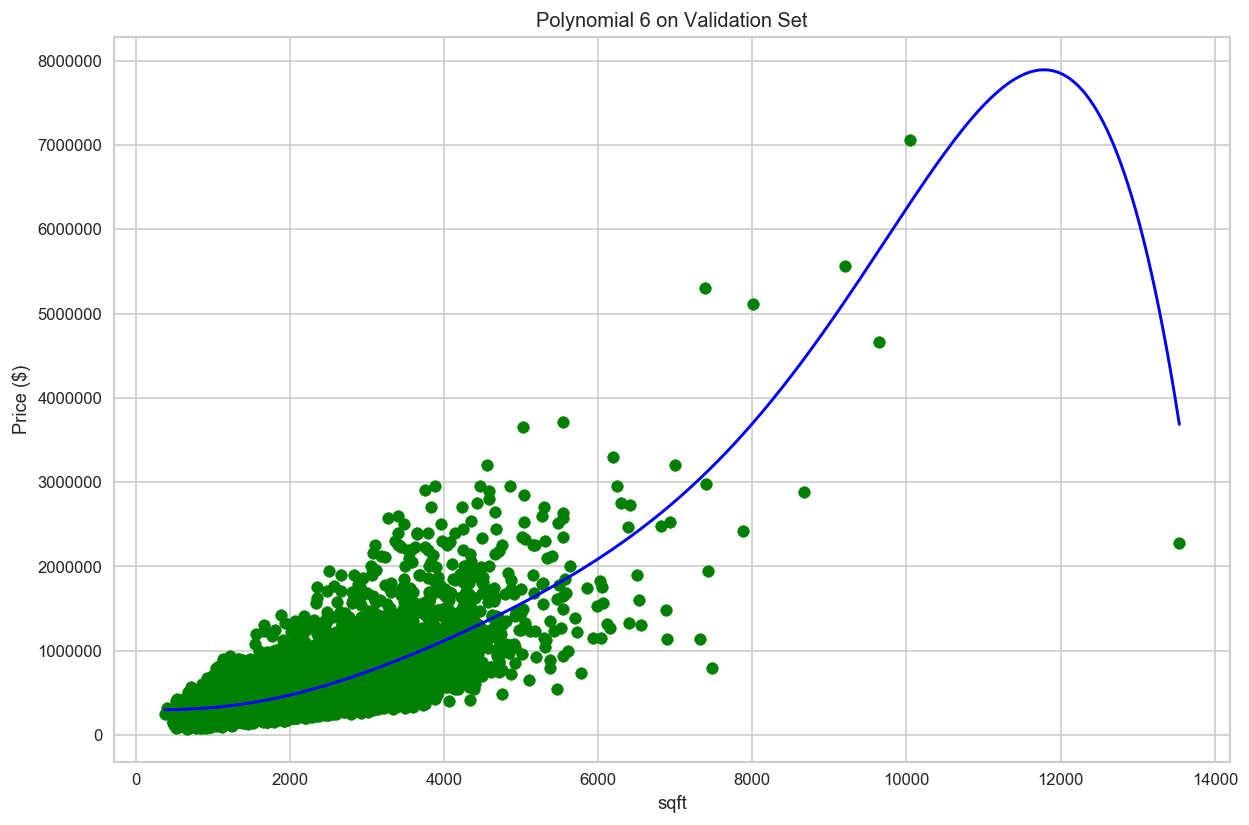

In [67]:
plt.figure(figsize=(12,8), dpi=120)
plt.subplot(111)

#create a grid with continuous 0.1 steps
X_grid = np.arange(min(xV), max(xV), 0.1)
#Need to reshape the above vector into a matrix
X_grid = X_grid.reshape((len(X_grid),1))
plt.scatter(xV, yV, color ='green')
plt.plot(X_grid, poly_reg_6.predict(poly_reg.fit_transform(X_grid)), color ='blue')
plt.title("Polynomial 6 on Validation Set")
plt.xlabel("sqft")
plt.ylabel("Price ($)")
plt.show()

In [68]:
# ypred{ polynomial 5} 
yPoly_6V = poly_reg_6.predict(poly_reg.fit_transform(xV))

In [69]:
# Must match regressor object and prediction object
coef = poly_reg_6.coef_
intercept = poly_reg_6.intercept_ 
print(f'Intercept: {intercept:,.0f}')
print(f'coefficient: {coef}')


#Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(yV, yPoly_6V)
print(f"MSE: ${mse:,.0f}")

#Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"RMSE: ${rmse:,.0f}")



#R-squared
from sklearn.metrics import r2_score
rSquared = r2_score(yV, yPoly_6V)
print(f'R_squared: {rSquared:.3f}')

Intercept: 297,507
coefficient: [  0.00000000e+00   1.99363115e-08   2.44830292e-08   3.79412496e-05
  -9.89793412e-09   1.06074595e-12  -3.90873908e-17]
MSE: $58,772,033,327
RMSE: $242,429
R_squared: 0.537


##### Polynomial 6 on Test

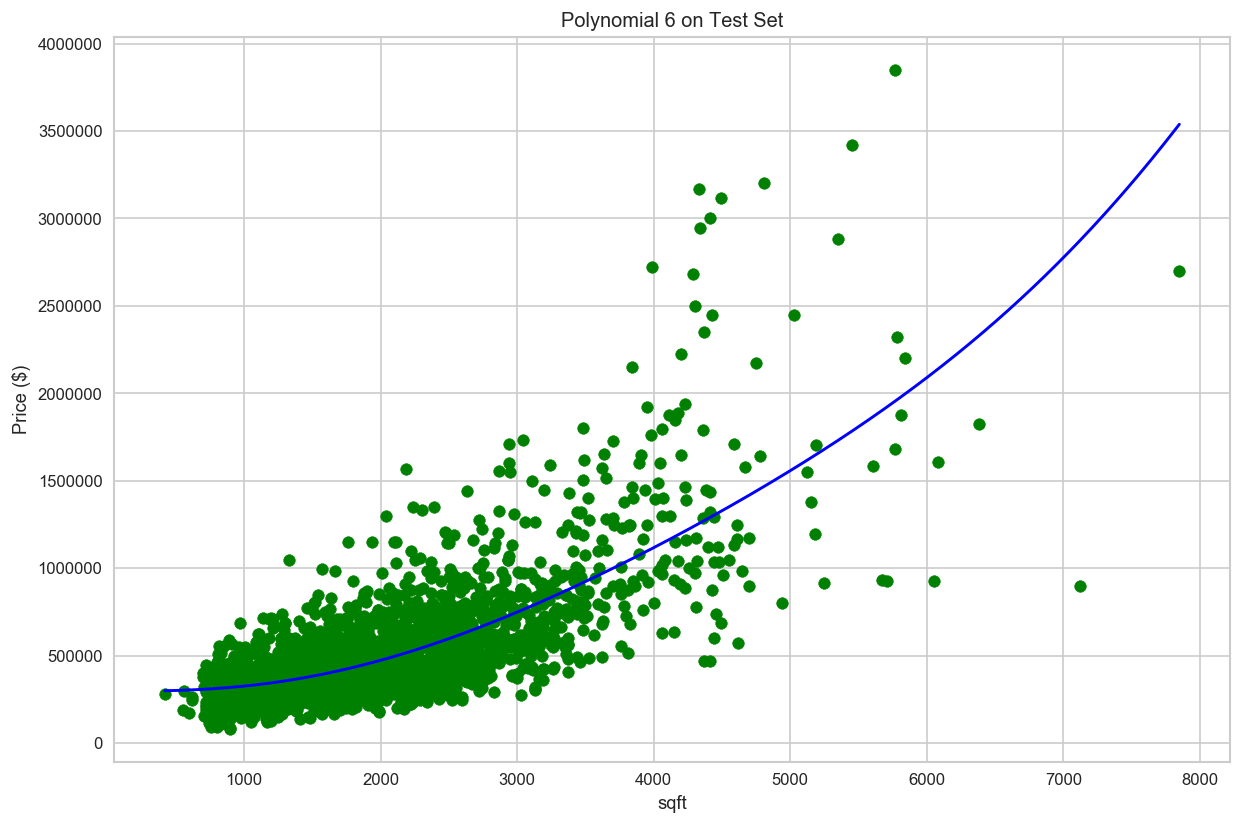

In [70]:

plt.figure(figsize=(12,8), dpi=120)
plt.subplot(111)

#create a grid with continuous 0.1 steps
X_grid = np.arange(min(xT), max(xT), 0.1)
#Need to reshape the above vector into a matrix
X_grid = X_grid.reshape((len(X_grid),1))
plt.scatter(xT, yT, color ='green')
plt.plot(X_grid, poly_reg_6.predict(poly_reg.fit_transform(X_grid)), color ='blue')
plt.title("Polynomial 6 on Test Set")
plt.xlabel("sqft")
plt.ylabel("Price ($)")
plt.show()

In [72]:
ypred15 = poly_reg_6.predict(poly_reg.fit_transform(xT))
# mean squared error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(yT, ypred15)
#Root Mean Squared Error
rmse = np.sqrt(mse)
print("RMSE: ${:,.0f}".format(rmse))
# Coefficient and Intercept
coef = poly_reg_6.coef_
intercept = poly_reg_6.intercept_ 
print('Intercept: {:,.0f}'.format(intercept))
print('coefficient: {}'.format(coef))

RMSE: $246,971
Intercept: 297,507
coefficient: [  0.00000000e+00   1.99363115e-08   2.44830292e-08   3.79412496e-05
  -9.89793412e-09   1.06074595e-12  -3.90873908e-17]


##### R-squared

In [73]:
from sklearn.metrics import r2_score
r2 = r2_score(yT, ypred15)
print(f"Rsquared: {r2}")

Rsquared: 0.5249955948788056
